### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x, y = np.concatenate([x_train, x_test], axis=0), np.concatenate([y_train, y_test], axis=0)
print(x.shape, y.shape)

(60000, 32, 32, 3) (60000, 1)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size=0.8)
print(x_train.shape, y_train.shape, x_rem.shape, y_rem.shape)

(48000, 32, 32, 3) (48000, 1) (12000, 32, 32, 3) (12000, 1)


In [5]:
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.5)
print(x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(6000, 32, 32, 3) (6000, 1) (6000, 32, 32, 3) (6000, 1)


In [6]:
y_train, y_val, y_test = y_train.ravel(), y_val.ravel(), y_test.ravel()

In [7]:
idx = {
    "train": [],
    "test": [],
    "val": []
}
for i in range(10):
  idx["train"].extend(list(np.where(y_train == i)[0][:1000]))
  idx["test"].extend(list(np.where(y_test == i)[0][:125]))
  idx["val"].extend(list(np.where(y_val == i)[0][:125]))
print(len(idx["train"]), len(idx["test"]), len(idx["val"]))

10000 1250 1250


In [8]:
x_train, x_val, x_test = x_train[idx["train"]], x_val[idx["val"]], x_test[idx["test"]]
y_train, y_val, y_test = y_train[idx["train"]], y_val[idx["val"]], y_test[idx["test"]]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(10000, 32, 32, 3) (10000,)
(1250, 32, 32, 3) (1250,)
(1250, 32, 32, 3) (1250,)


In [9]:
train, val, test = np.reshape(x_train, (x_train.shape[0], -1)), np.reshape(x_val, (x_val.shape[0], -1)), np.reshape(x_test, (x_test.shape[0], -1))
print(train.shape, val.shape, test.shape)

(10000, 3072) (1250, 3072) (1250, 3072)


In [10]:
from sklearn.metrics import accuracy_score,classification_report
def Report(x_train,x_test,y_train,y_test,classifier):
  training_error, testing_error, precision, recall, accuracy = 0, 0, 0, 0, 0
  y_pred_train = classifier.predict(x_train)
  y_pred_test = classifier.predict(x_test)
  training_error = 1 - accuracy_score(y_train,y_pred_train)
  testing_error = 1 - accuracy_score(y_test,y_pred_test)
  accuracy = 1 - testing_error
  print("Training error:{}\nTesting error:{}\nAccuracy:{}\n".format(training_error,testing_error,accuracy))
  target_names = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
  print(classification_report(y_test,y_pred_test,target_names=target_names))

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from sklearn.multiclass import OneVsRestClassifier

def PlotROC(y_test,y_score,x):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(10):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  plt.figure()
  lw = 2
  plt.plot(fpr[2], tpr[2], color='red',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic '+x)
  plt.legend(loc="lower right")
  plt.show()


def prepareandplotROC(x_train,x_test,y_train,y_test,classifier,x):
  y_train = label_binarize(y_train,classes = [*range(10)])
  y_test = label_binarize(y_test,classes = [*range(10)])
  clf = OneVsRestClassifier(classifier).fit(x_train,y_train)
  if x not in ["Decision Trees","Random forest", "K Nearest Neighbors"]:
    y_score = clf.decision_function(x_test)
  else:
    y_score = clf.predict_proba(x_test)
  PlotROC(y_test,y_score,x)

### K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [13]:
y_train_pred_knn = knn_classifier.predict(train)
y_val_pred_knn = knn_classifier.predict(val)
y_test_pred_knn = knn_classifier.predict(test)

In [14]:
print("For KNN classifier")
print(f"Train set error: {1-accuracy_score(y_train_pred_knn, y_train)}\nValidation set error: {1-accuracy_score(y_val_pred_knn, y_val)}\nTest set error: {1-accuracy_score(y_test_pred_knn, y_test)}")

For KNN classifier
Train set error: 0.623
Validation set error: 0.7008
Test set error: 0.7024


In [15]:
print("KNN Classifier metrics:")
print(f"Accuracy: \nTraining set: {accuracy_score(y_train_pred_knn, y_train)}\nValidation set: {accuracy_score(y_val_pred_knn, y_val)}\nTesting set: {accuracy_score(y_test_pred_knn, y_test)}\n")
print(f"Precision: \nTraining set: {precision_score(y_train_pred_knn, y_train, average='macro')}\nValidation set: {precision_score(y_val_pred_knn, y_val, average='macro')}\nTesting set: {precision_score(y_test_pred_knn, y_test, average='macro')}\n")
print(f"Recall: \nTraining set: {recall_score(y_train_pred_knn, y_train, average='macro')}\nValidation set: {recall_score(y_val_pred_knn, y_val, average='macro')}\nTesting set: {recall_score(y_test_pred_knn, y_test, average='macro')}")

KNN Classifier metrics:
Accuracy: 
Training set: 0.377
Validation set: 0.2992
Testing set: 0.2976

Precision: 
Training set: 0.377
Validation set: 0.2992
Testing set: 0.29760000000000003

Recall: 
Training set: 0.5162522133674566
Validation set: 0.3862125460328686
Testing set: 0.39476869014569776


In [16]:
Report(train, test, y_train, y_test, knn_classifier)

Training error:0.623
Testing error:0.7024
Accuracy:0.2976

              precision    recall  f1-score   support

    Airplane       0.34      0.53      0.41       125
  Automobile       0.59      0.08      0.14       125
        Bird       0.19      0.47      0.27       125
         Cat       0.37      0.15      0.21       125
        Deer       0.23      0.45      0.30       125
         Dog       0.44      0.19      0.27       125
        Frog       0.39      0.30      0.33       125
       Horse       0.62      0.14      0.23       125
        Ship       0.31      0.60      0.41       125
       Truck       0.47      0.06      0.11       125

    accuracy                           0.30      1250
   macro avg       0.39      0.30      0.27      1250
weighted avg       0.39      0.30      0.27      1250



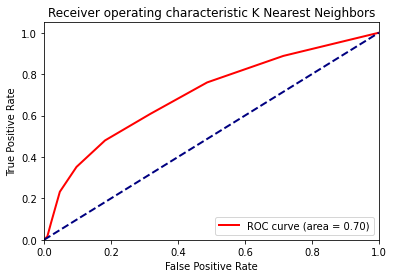

In [17]:
prepareandplotROC(train,test,y_train,y_test,knn_classifier,"K Nearest Neighbors")

### Support Vector Machine

In [18]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(train, y_train)

SVC()

In [19]:
y_train_pred_svm = svm_classifier.predict(train)
y_val_pred_svm = svm_classifier.predict(val)
y_test_pred_svm = svm_classifier.predict(test)

In [20]:
print("For SVM classifier")
print(f"Train set error: {1-accuracy_score(y_train_pred_svm, y_train)}\nValidation set error: {1-accuracy_score(y_val_pred_svm, y_val)}\nTest set error: {1-accuracy_score(y_test_pred_svm, y_test)}")

For SVM classifier
Train set error: 0.2944
Validation set error: 0.5224
Test set error: 0.5448


In [21]:
print("SVM Classifier metrics:")
print(f"Accuracy: \nTraining set: {accuracy_score(y_train_pred_svm, y_train)}\nValidation set: {accuracy_score(y_val_pred_svm, y_val)}\nTesting set: {accuracy_score(y_test_pred_svm, y_test)}\n")
print(f"Precision: \nTraining set: {precision_score(y_train_pred_svm, y_train, average='macro')}\nValidation set: {precision_score(y_val_pred_svm, y_val, average='macro')}\nTesting set: {precision_score(y_test_pred_svm, y_test, average='macro')}\n")
print(f"Recall: \nTraining set: {recall_score(y_train_pred_svm, y_train, average='macro')}\nValidation set: {recall_score(y_val_pred_svm, y_val, average='macro')}\nTesting set: {recall_score(y_test_pred_svm, y_test, average='macro')}")

SVM Classifier metrics:
Accuracy: 
Training set: 0.7056
Validation set: 0.4776
Testing set: 0.4552

Precision: 
Training set: 0.7056
Validation set: 0.47759999999999997
Testing set: 0.45519999999999994

Recall: 
Training set: 0.7054583067134653
Validation set: 0.47650159698408434
Testing set: 0.45180451105467834


In [22]:
Report(train, test, y_train, y_test, svm_classifier)

Training error:0.2944
Testing error:0.5448
Accuracy:0.45520000000000005

              precision    recall  f1-score   support

    Airplane       0.46      0.48      0.47       125
  Automobile       0.53      0.60      0.56       125
        Bird       0.33      0.24      0.28       125
         Cat       0.39      0.32      0.35       125
        Deer       0.42      0.47      0.44       125
         Dog       0.42      0.38      0.40       125
        Frog       0.44      0.59      0.51       125
       Horse       0.55      0.45      0.50       125
        Ship       0.48      0.50      0.49       125
       Truck       0.48      0.51      0.50       125

    accuracy                           0.46      1250
   macro avg       0.45      0.46      0.45      1250
weighted avg       0.45      0.46      0.45      1250



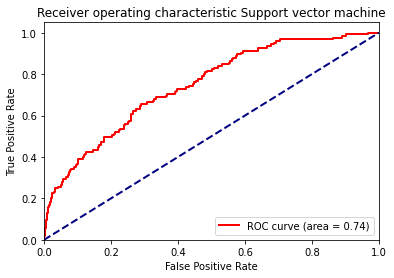

In [23]:
prepareandplotROC(train,test,y_train,y_test,svm_classifier,"Support vector machine")

### Convolutional Neural Network

In [24]:
from tensorflow.keras.utils import to_categorical
train = x_train.copy()
test = x_test.copy()
val = x_val.copy()
trainY = to_categorical(y_train)
valY = to_categorical(y_val)
testY = to_categorical(y_test)
train = train.astype('float32')
train = train / 255.0
val = val.astype('float32')
val = val / 255.0
test = test.astype('float32')
test = test / 255.0

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [26]:
model = define_model()

In [27]:
model.fit(train, trainY, epochs=5, validation_data=(val, valY))

Epoch 1/5
313/313 [==============================] - 54s 171ms/step - loss: 2.0771 - accuracy: 0.2378 - val_loss: 1.7978 - val_accuracy: 0.3320
Epoch 2/5
313/313 [==============================] - 53s 168ms/step - loss: 1.6939 - accuracy: 0.3860 - val_loss: 1.6080 - val_accuracy: 0.4152
Epoch 3/5
313/313 [==============================] - 52s 167ms/step - loss: 1.5566 - accuracy: 0.4418 - val_loss: 1.5302 - val_accuracy: 0.4448
Epoch 4/5
313/313 [==============================] - 53s 168ms/step - loss: 1.4182 - accuracy: 0.4880 - val_loss: 1.4478 - val_accuracy: 0.4720
Epoch 5/5
313/313 [==============================] - 53s 169ms/step - loss: 1.3243 - accuracy: 0.5253 - val_loss: 1.3308 - val_accuracy: 0.5192


In [28]:
y_train_pred_cnn = np.argmax(model.predict(train), axis=1)
y_val_pred_cnn = np.argmax(model.predict(val), axis=1)
y_test_pred_cnn = np.argmax(model.predict(test),axis=1)

In [29]:
print("For CNN classifier")
print(f"Train set error: {1-accuracy_score(y_train_pred_cnn, y_train)}\nValidation set error: {1-accuracy_score(y_val_pred_cnn, y_val)}\nTest set error: {1-accuracy_score(y_test_pred_cnn, y_test)}")

For CNN classifier
Train set error: 0.4263
Validation set error: 0.4808
Test set error: 0.5024


In [30]:
print("CNN Classifier metrics:")
print(f"Accuracy: \nTraining set: {accuracy_score(y_train_pred_cnn, y_train)}\nValidation set: {accuracy_score(y_val_pred_cnn, y_val)}\nTesting set: {accuracy_score(y_test_pred_cnn, y_test)}\n")
print(f"Precision: \nTraining set: {precision_score(y_train_pred_cnn, y_train, average='macro')}\nValidation set: {precision_score(y_val_pred_cnn, y_val, average='macro')}\nTesting set: {precision_score(y_test_pred_cnn, y_test, average='macro')}\n")
print(f"Recall: \nTraining set: {recall_score(y_train_pred_cnn, y_train, average='macro')}\nValidation set: {recall_score(y_val_pred_cnn, y_val, average='macro')}\nTesting set: {recall_score(y_test_pred_cnn, y_test, average='macro')}")

CNN Classifier metrics:
Accuracy: 
Training set: 0.5737
Validation set: 0.5192
Testing set: 0.4976

Precision: 
Training set: 0.5737
Validation set: 0.5192
Testing set: 0.4976

Recall: 
Training set: 0.5866439878932144
Validation set: 0.525833759137058
Testing set: 0.5062292698608336


In [31]:
target_names = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
print(classification_report(y_test,y_test_pred_cnn,target_names=target_names))

              precision    recall  f1-score   support

    Airplane       0.50      0.48      0.49       125
  Automobile       0.63      0.65      0.64       125
        Bird       0.59      0.19      0.29       125
         Cat       0.40      0.32      0.36       125
        Deer       0.56      0.46      0.50       125
         Dog       0.48      0.38      0.42       125
        Frog       0.48      0.67      0.56       125
       Horse       0.44      0.71      0.54       125
        Ship       0.47      0.50      0.48       125
       Truck       0.53      0.62      0.57       125

    accuracy                           0.50      1250
   macro avg       0.51      0.50      0.49      1250
weighted avg       0.51      0.50      0.49      1250



In [32]:
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    new_y_test = y_test.copy()
    new_y_test[new_y_test != i] = -1
    new_y_test[new_y_test == i] = 1
    new_y_test[new_y_test == 255] = 0
    new_y_test_pred_cnn = y_test_pred_cnn.copy()
    new_y_test_pred_cnn[new_y_test_pred_cnn != i] = -1
    new_y_test_pred_cnn[new_y_test_pred_cnn == i] = 1
    new_y_test_pred_cnn[new_y_test_pred_cnn == 255] = 0
    fpr[i], tpr[i], _ = roc_curve(new_y_test, new_y_test_pred_cnn)
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

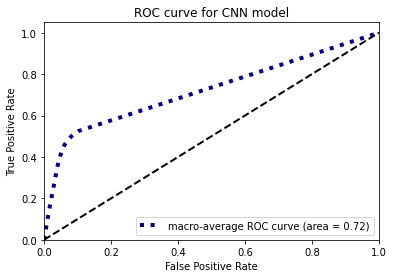

In [33]:
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for CNN model')
plt.legend(loc="lower right")
plt.show()

Based on the ROC Curves plotted for each model, SVM performs best, but the CNN on training with more epochs(~20) can perform even better. Hence we can choose CNN for classification.